## TITANIC SURVIVAL ANALYSIS
Project Goal: Explore the Titanic dataset to uncover survival patterns


#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 2. Load the Dataset

In [2]:
df = pd.read_csv('train.csv') 

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 3. Data Cleaning
- Handle missing values
- Convert data types for analysis


In [3]:
# Check missing values
df.isnull().sum()

# Fill missing Age with median
df['Age']= df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

# Convert types
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


#### 4. Summary Statistics


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,0.0,3.0,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,NaN,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,NaN,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,NaN,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


#### 5. Group-Based Insights
a. Survival by Gender


In [ ]:
df['Survived'] = df['Survived'].astype(int)  # Convert back to numeric to plot
df.groupby('Sex', observed=True)['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

b.Survival by Class

In [ ]:
df['Survived'] = df['Survived'].astype(int)  # Convert back to numeric to plot
df.groupby('Pclass', observed=True)['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

 #### 6. Visualizations




a. Survival Rate By Gender

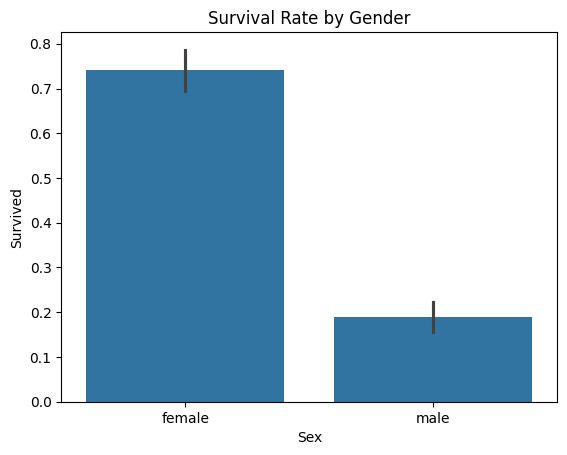

In [7]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


b. Survival Rate By Class

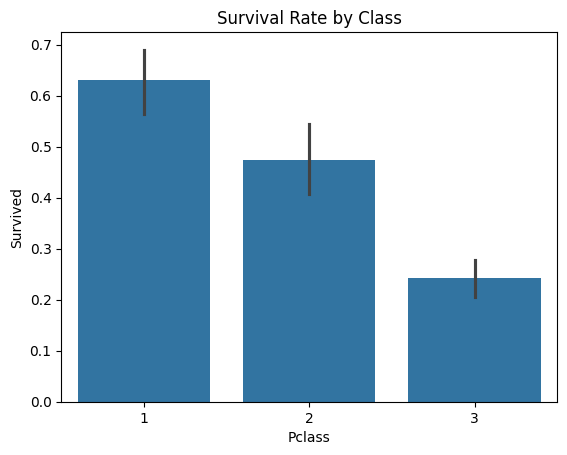

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

c. Age Distribution

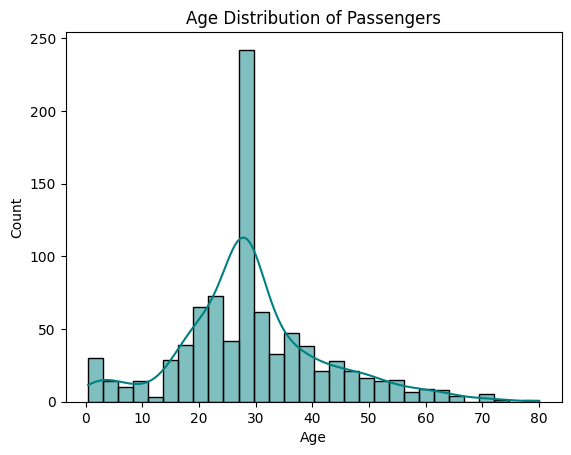

In [12]:
sns.histplot(df['Age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution of Passengers')
plt.show()


d. Correlation Heatmap


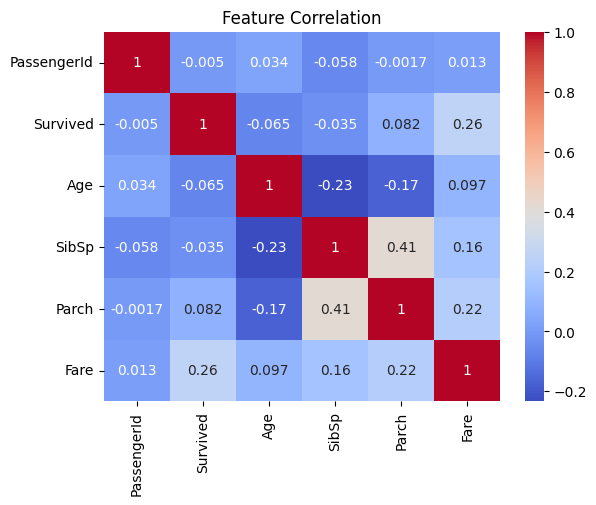

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()
